### This script contains the following:\n",
    #### 1. Importing your libraries and data
    #### 2. Subsetting, wrangling, and cleaning time-series data
    #### 3. Time series analysis: decomposition
    #### 4. Testing for stationarity
    #### 5. Stationarizing the WASDE Data

### 1. Importing your libraries and data"

"Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:\n",
    "\n",
    "`conda install quandl`"

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles \n",
# statistical models.\n",
import os
import warnings # This is a library that handles warnings.warnings.filterwarnings(\"ignore\") # Disable deprecation warnings that could indicate, for instance, a suspended library or \n",  
# feature. These are more relevant to developers and very seldom to analysts.\n",
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:\n",
#https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html\n",
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html"

In [2]:
# Configure API key \n",
quandl.ApiConfig.api_key = 'wEWwQZCj5wu-_FAUrERy'

In [10]:
# Importing OECD data on Tendency in the Euro area. 
data = quandl.get("OECD/MEI_BTS_COS_BSOITE_EA19_BLSA_Q")

In [11]:
data.shape

(154, 1)

In [12]:
data.head(5)

,Value
Date,
1985-03-31,-0.8
1985-06-30,0.6
1985-09-30,3.1
1985-12-31,7.0
1986-03-31,2.4


In [13]:
data.columns

Index(['Value'], dtype='object')

In [14]:
type(data)

pandas.core.frame.DataFrame

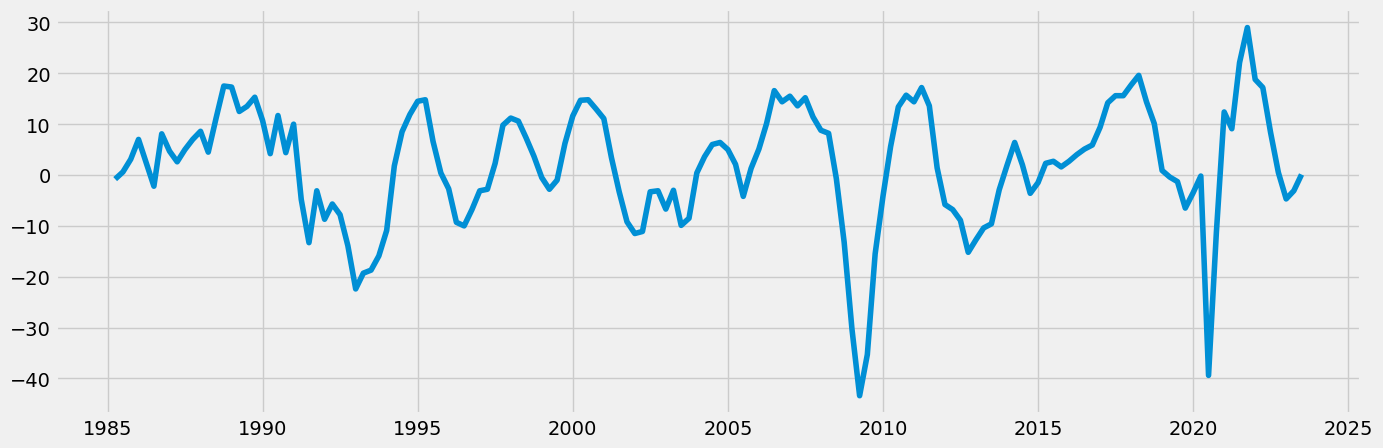

In [15]:
# Plot the data using matplotlib.\n",
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100
#it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.\n",
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!\n",
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data"

In [16]:
# Reset index so that you can use the \"Date\" column as a filter
data_2 = data.reset_index()

In [17]:
data_2.head()

,Date,Value
0,1985-03-31,-0.8
1,1985-06-30,0.6
2,1985-09-30,3.1
3,1985-12-31,7.0
4,1986-03-31,2.4


In [43]:
#specifying the date range to get a closer and more recent analysis (optional)
data_sub = data_2.loc[(data_2['Date'] >= '2002-01-01') & (data_2['Date'] < '2022-06-01')]

In [44]:
data_sub.shape

(81, 2)

In [45]:
data_sub.head()

,Date,Value
68,2002-03-31,-11.1
69,2002-06-30,-3.3
70,2002-09-30,-3.1
71,2002-12-31,-6.7
72,2003-03-31,-3.0


In [46]:
# Set the \"Date\" column as the index
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from \"Date.\"\"\n",
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.\n",
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.\n",
data_sub.head()

C:\Users\Chloe\AppData\Local\Temp\ipykernel_14412\487033646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from \"Date.\"\"\n",


,Value
datetime,
2002-03-31,-11.1
2002-06-30,-3.3
2002-09-30,-3.1
2002-12-31,-6.7
2003-03-31,-3.0


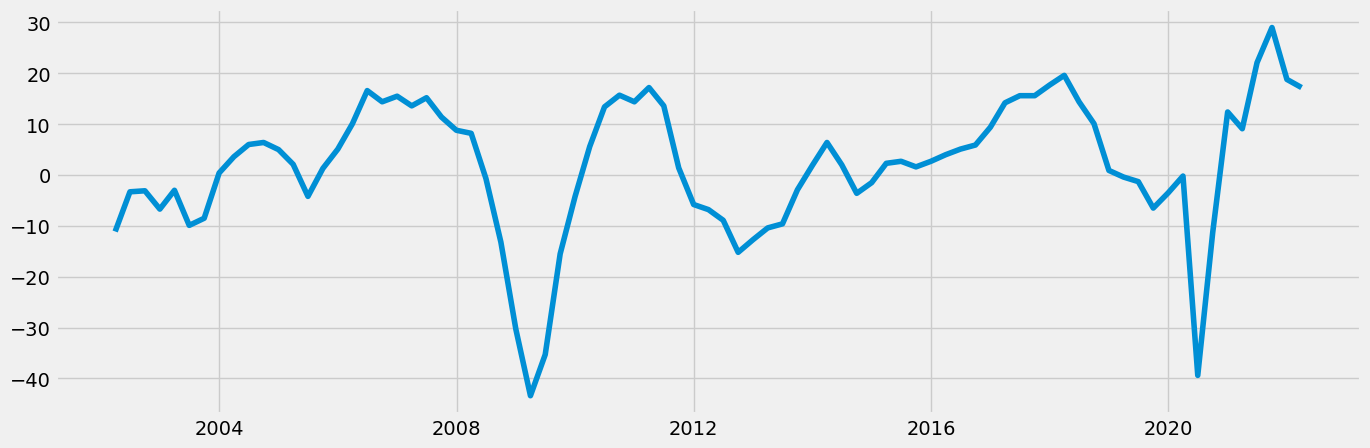

In [47]:
# Plot the new data set\n",
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [25]:
# Check for missing values (you shouldn't have any)
data_sub.isnull().sum()

Value    0
dtype: int64

In [26]:
# Check for duplicates\n",
dups = data_sub.duplicated()
dups.sum()
#ignore for current exercise

21

### 3. Time-series analysis: decomposition

In [27]:
# Decompose the time series using an additive model\n",
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",
rcParams['figure.figsize'] = 18, 7

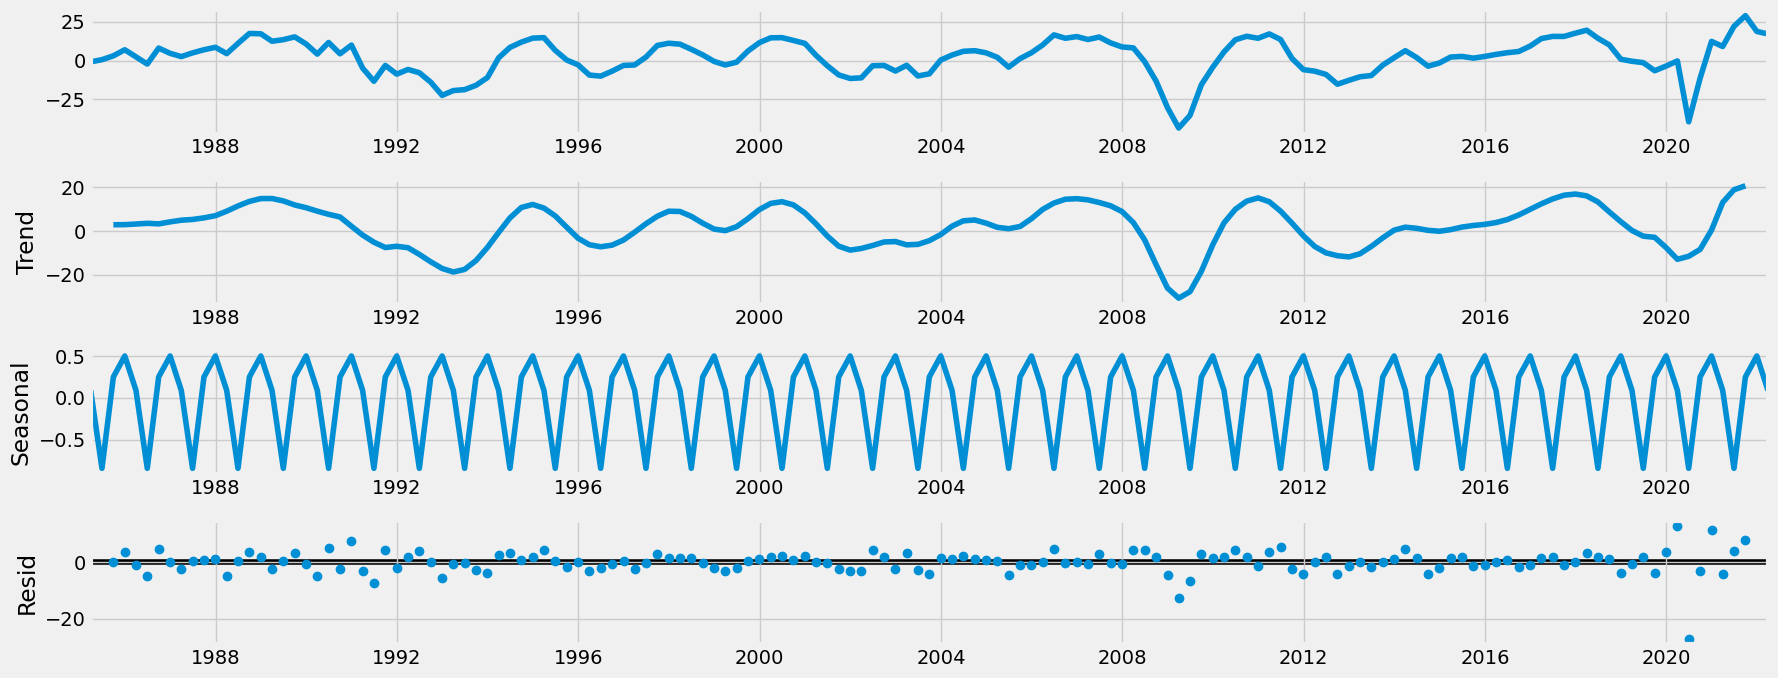

In [29]:
# Plot the separate components\n",
decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return \n",
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function\n",
def dickey_fuller(timeseries): # Define the function
# Perform the Dickey-Fuller test:!!watch out for indentations!
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
        print (result)
# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.420517e+00
p-value                        1.796360e-08
Number of Lags Used            3.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
dtype: float64
Test Statistic                -6.420517e+00
p-value                        1.796360e-08
Number of Lags Used            3.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
dtype: float64
Test Statistic                -6.420517e+00
p-value                        1.796360e-08
Number of Lags Used            3.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
Critical Value (10%)          -2.577513e+00
dtype: float64


#An analysis of the results above shows a test statistic which is bigger than a critical value at 5% but smaller than a critical value at 10% The p-value is not satisfactory, so I must accept the null hypothesis and consider that my data is not stationary.The plot of autocorrelations below also demonstrates this in visual form. 

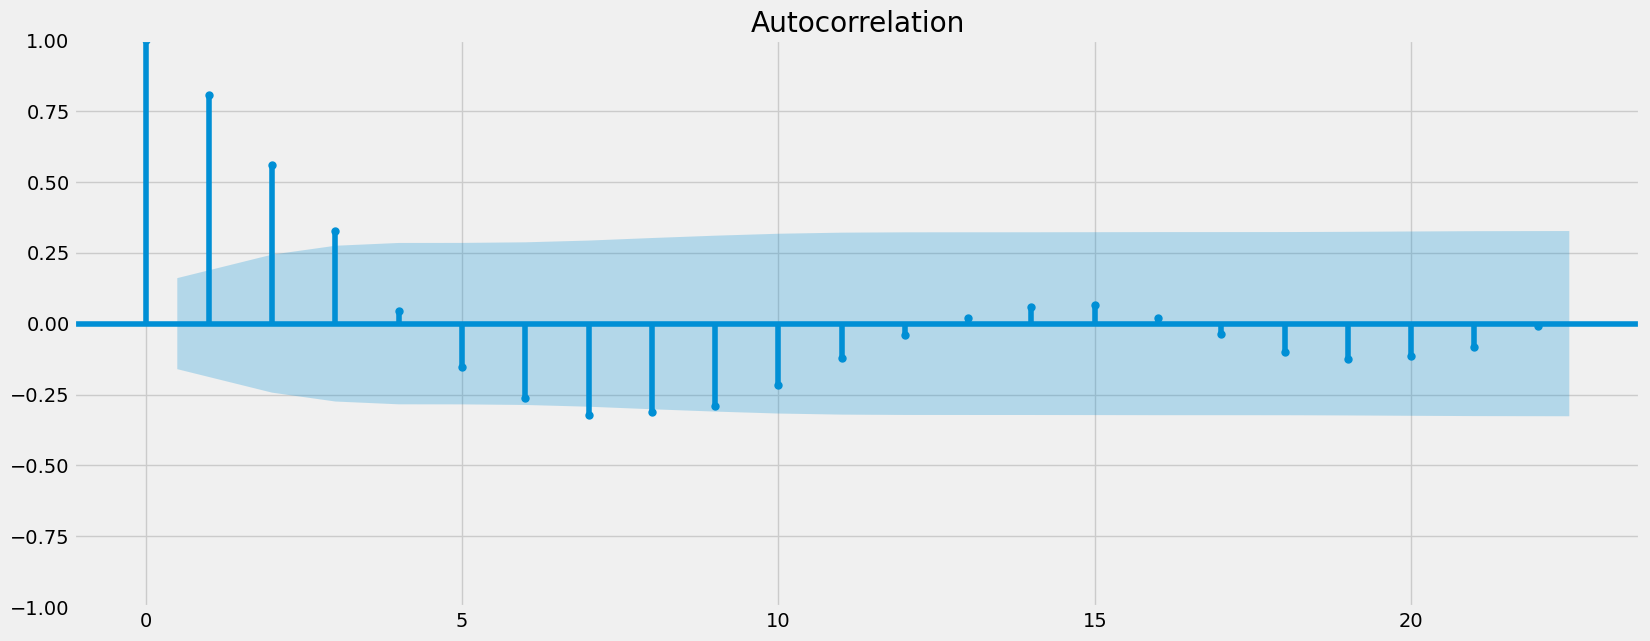

In [35]:
# Check out a plot of autocorrelations\n",
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",
plot_acf(data_sub)
plt.show()

### 5. Stationarizing the OECD Data

In [36]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)"

In [37]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. \n",
# You need to remove these or you won't be able to run the Dickey-Fuller test."

In [38]:
data_diff.head()

,Value
datetime,
1985-06-30,1.4
1985-09-30,2.5
1985-12-31,3.9
1986-03-31,-4.6
1986-06-30,-4.6


In [39]:
data_diff.columns

Index(['Value'], dtype='object')

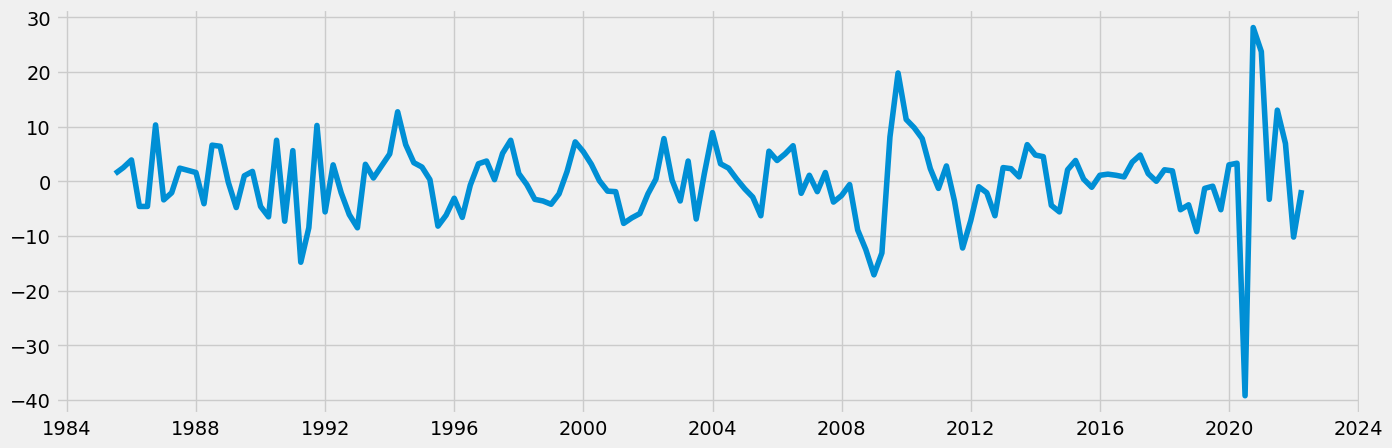

In [40]:
# Check out what the differencing did to the time-series curve\n",
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [41]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.417032e+00
p-value                        1.830463e-08
Number of Lags Used            8.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
dtype: float64
Test Statistic                -6.417032e+00
p-value                        1.830463e-08
Number of Lags Used            8.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
dtype: float64
Test Statistic                -6.417032e+00
p-value                        1.830463e-08
Number of Lags Used            8.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
Critical Value (10%)          -2.577983e+00
dtype: float64


In [ ]:
#the process has been repeated, and now the p-value is slightly larger than before, although still below 10%, the data has very weak stationarity.

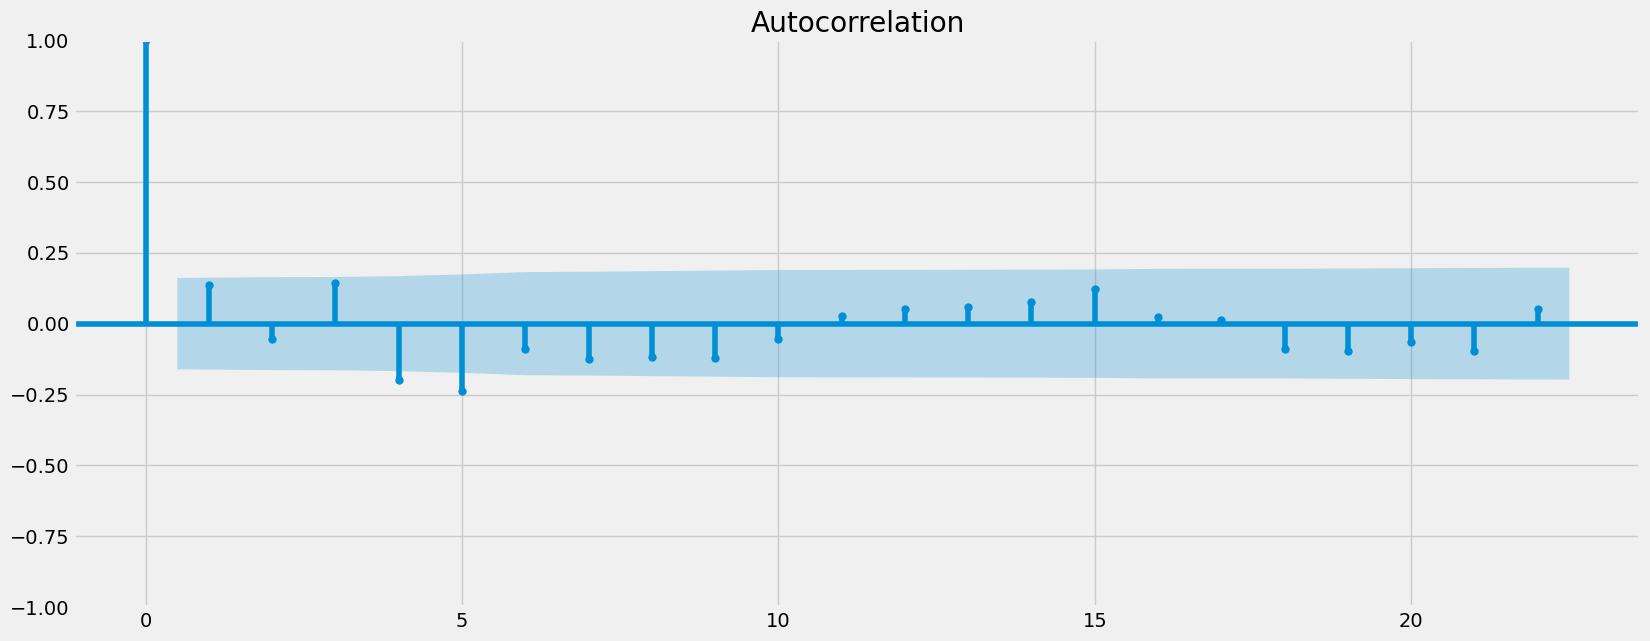

In [42]:
plot_acf(data_diff)
plt.show()

In [ ]:
#the data is stationary but only very weakly, the p-value is less than 10%, p=<0.001 but more than 5% (p= >0.05)